In [1]:
%pylab inline

/Users/sgkang/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [2]:
from SimPEG.EM.Analytics import Mijfun, Cfun, Qfun
from SimPEG.EM.Analytics.FDEM import MagneticDipoleWholeSpace

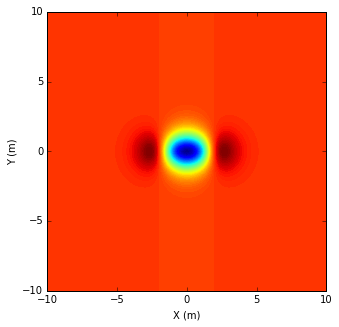

In [3]:
L = 1.
R = 2000.
xc = 0.
yc = 0.
zc = 2.
incl = 0.
decl = 90.
S = 4.
ht = 0.
f = 10000.
xmin = -10.
xmax = 10.
dx = 0.25
xp = np.linspace(xmin, xmax, 101)
yp = xp.copy()
zp = np.r_[-ht]
[X, Y] = np.meshgrid(xp, yp)
xyz = np.c_[X.flatten(), Y.flatten(), np.ones_like(X.flatten())*ht]
c, m12, m23, m13 = Cfun(L,R,xc,yc,zc,incl,decl,S,ht,f,xyz)
C = c.reshape(X.shape)
fig = plt.figure(figsize=(5,5))
plt.contourf(X, Y, C, 100)
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.show()

In [4]:
from scipy.constants import mu_0
bx, by, bz = MagneticDipoleWholeSpace(xyz, np.r_[0., 0., 0.], 1e-8, 1e-8, moment=1., orientation='Y', mu = mu_0)

/Users/sgkang/Projects/simpeg/SimPEG/EM/Analytics/FDEM.py:82: RuntimeWarning: divide by zero encountered in true_divide
  front = moment / (4.*pi * r**3.) * np.exp(-1j*kr)
/Users/sgkang/Projects/simpeg/SimPEG/EM/Analytics/FDEM.py:82: RuntimeWarning: invalid value encountered in multiply
  front = moment / (4.*pi * r**3.) * np.exp(-1j*kr)
/Users/sgkang/Projects/simpeg/SimPEG/EM/Analytics/FDEM.py:91: RuntimeWarning: invalid value encountered in true_divide
  Hx = front*( (dy*dx/r**2.) * mid )
/Users/sgkang/Projects/simpeg/SimPEG/EM/Analytics/FDEM.py:92: RuntimeWarning: invalid value encountered in true_divide
  Hy = front*( (dy/r)**2. * mid + (kr**2. - 1j*kr - 1.) )
/Users/sgkang/Projects/simpeg/SimPEG/EM/Analytics/FDEM.py:93: RuntimeWarning: invalid value encountered in true_divide
  Hz = front*( (dy*dz/r**2.) * mid )


/Users/sgkang/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:812: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)


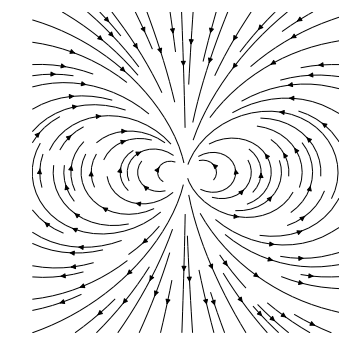

In [5]:
fig = plt.figure(figsize=(5,5))
plt.streamplot(X, Y, -(bx.real).reshape(X.shape), -(by.real).reshape(Y.shape), color="k")
plt.tight_layout()
plt.axis("off")
fig.savefig("dipole", dpi=100)

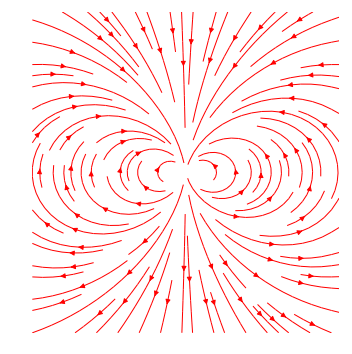

In [6]:
fig = plt.figure(figsize=(5,5))
plt.streamplot(X, Y, -(bx.real).reshape(X.shape), -(by.real).reshape(Y.shape), color="r")
plt.tight_layout()
plt.axis("off")
fig.savefig("dipole_red", dpi=100)

In [7]:
!pwd

/Users/sgkang/Projects/em_examples/notebooks/maxwell3_fdem


In [8]:
xyz_profile = np.c_[xp, np.zeros_like(xp), np.ones_like(xp)*ht]
c_profile, m12_profile, m23_profile, m13_profile = Cfun(L,R,xc,yc,zc,incl,decl,S,ht,f,xyz_profile)

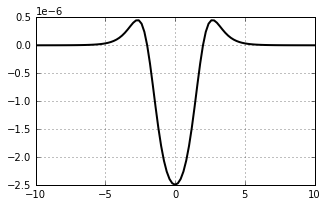

In [11]:
figsize(5, 3)
plt.plot(xp, c_profile, 'k', lw=2)
# plt.plot(xp-S/2, m12_profile, 'b', lw=2)
# plt.plot(xp-S/2, m23_profile, 'r', lw=2)
# plt.plot(xp-S/2, m13_profile, 'g', lw=2)
# plt.plot(xp, np.zeros_like(xp), 'k--', lw=1)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.grid(True)

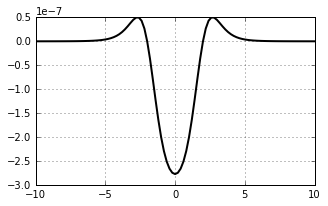

In [18]:
figsize(5, 3)
plt.plot(xp, c_profile, 'k', lw=2)
# plt.plot(xp, m12_profile, 'b', lw=2)
# plt.plot(xp, m23_profile, 'r', lw=2)
# plt.plot(xp, m13_profile, 'g', lw=2)
# plt.plot(xp, np.zeros_like(xp), 'k--', lw=1)
plt.grid(True)

In [21]:
alpha = np.logspace(-3, 3, 100)
alpha, Q = Qfun(R, L, None, alpha=alpha)

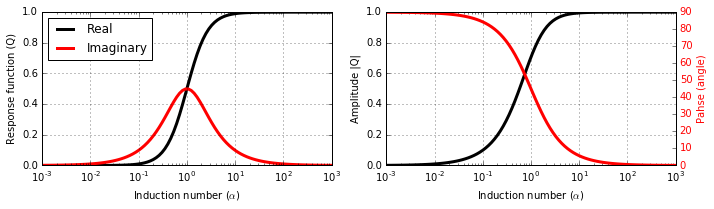

In [31]:
fig = plt.figure(figsize=(10, 3))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
ax2_1 = ax2.twinx()
ax1.semilogx(alpha, Q.real, 'k', lw=3)
ax1.semilogx(alpha, Q.imag, 'r', lw=3)
ax1.grid(True)
ax1.legend(("Real","Imaginary"), loc=2)
ax1.set_xlabel("Induction number ($\\alpha$)")
ax1.set_ylabel("Response function (Q)")
ax2.semilogx(alpha, abs(Q), 'k', lw=3)
ax2_1.semilogx(alpha, np.angle(Q, deg=True), 'r', lw=3)
ax2.grid(True)
ax2.set_ylabel("Amplitude |Q|")
ax2_1.set_ylabel('Pahse (angle)', color='r')
ax2.set_xlabel("Induction number ($\\alpha$)")
for tl in ax2_1.get_yticklabels():
    tl.set_color('r')
plt.tight_layout()
plt.show()

In [117]:
plt.ti